## Data Loading and Processing

In [88]:
import pandas as pd

# Load the industry returns data with the first column being the date
industry_returns = pd.read_csv('/Users/emanuelciudin/Documents/development/Machine Learning with Finance/48_Industry_Portfolios_daily.CSV')
industry_returns = industry_returns.rename(columns={'Unnamed: 0': 'Date'})

# Take equally weighted data into account
industry_returns = industry_returns.iloc[24101:]
industry_returns['Date'] = pd.to_datetime(industry_returns['Date'], format='%Y%m%d')
industry_returns.set_index('Date', inplace=True)

display(industry_returns.head())
print(len(industry_returns))

/var/folders/wy/xrvq7vf97jg85lwy7lh6y0740000gn/T/ipykernel_14746/3163922071.py:4: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  industry_returns = pd.read_csv('/Users/emanuelciudin/Documents/development/Machine Learning with Finance/48_Industry_Portfolios_daily.CSV')


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.63,-0.28,NaN,-0.74,-0.04,-1.44,0.57,-1.27,-0.59,-0.37,...,-0.25,0.32,1.50,-0.13,-0.22,2.26,0.54,1.46,-0.14,-0.75
1926-07-02,1.03,0.11,NaN,0.09,0.40,1.46,0.18,0.00,0.17,-0.26,...,0.25,-0.52,0.00,-0.06,-0.86,0.94,-0.19,2.10,0.12,2.47
1926-07-06,-1.26,-0.12,NaN,-0.25,0.63,-0.96,0.09,4.27,-0.28,0.25,...,0.95,0.22,0.42,0.17,-0.28,0.25,0.69,-0.41,-0.02,0.66
1926-07-07,1.55,-0.43,NaN,-2.02,-0.76,-0.49,0.11,-4.10,-0.06,-0.33,...,1.05,-0.14,-7.24,-0.41,-0.72,-0.84,0.13,-2.24,-1.24,0.41
1926-07-08,0.95,1.01,NaN,-0.08,1.00,-0.49,-0.01,0.00,0.18,-0.26,...,-0.48,0.16,2.56,-0.29,-0.04,0.74,-0.83,-0.21,-0.96,-0.60


24099


In [89]:
industry_returns = industry_returns.apply(pd.to_numeric, errors='coerce')

display(industry_returns.head())

def find_first_complete_row(df):
    # Iterate over the DataFrame row by row
    for date, row in df.iterrows():
        if not row.isnull().any():  # Check if the row has no NaN values
            return date  # Return the date of the first complete row
    return None

# Find the first date with a complete row
first_complete_date = find_first_complete_row(industry_returns)

if first_complete_date is not None:
    print(f"The first complete row with no missing values is on: {first_complete_date.strftime('%Y-%m-%d')}")
else:
    print("No complete row found in the dataset.")



,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.63,-0.28,NaN,-0.74,-0.04,-1.44,0.57,-1.27,-0.59,-0.37,...,-0.25,0.32,1.50,-0.13,-0.22,2.26,0.54,1.46,-0.14,-0.75
1926-07-02,1.03,0.11,NaN,0.09,0.40,1.46,0.18,0.00,0.17,-0.26,...,0.25,-0.52,0.00,-0.06,-0.86,0.94,-0.19,2.10,0.12,2.47
1926-07-06,-1.26,-0.12,NaN,-0.25,0.63,-0.96,0.09,4.27,-0.28,0.25,...,0.95,0.22,0.42,0.17,-0.28,0.25,0.69,-0.41,-0.02,0.66
1926-07-07,1.55,-0.43,NaN,-2.02,-0.76,-0.49,0.11,-4.10,-0.06,-0.33,...,1.05,-0.14,-7.24,-0.41,-0.72,-0.84,0.13,-2.24,-1.24,0.41
1926-07-08,0.95,1.01,NaN,-0.08,1.00,-0.49,-0.01,0.00,0.18,-0.26,...,-0.48,0.16,2.56,-0.29,-0.04,0.74,-0.83,-0.21,-0.96,-0.60


The first complete row with no missing values is on: 1969-07-01


In [90]:
# Check directly for NaN presence from a specific year onwards
start_date_check = '1969-07-01'

# Assuming the index is a DatetimeIndex
if not industry_returns.loc[start_date_check:].isnull().any(axis=None):
    print(f"The dataset is NaN-free from {start_date_check} onwards.")
else:
    print(f"The dataset has NaN values after {start_date_check}.")


The dataset is NaN-free from 1969-07-01 onwards.


In [91]:
# Computing final dataframe

industry_returns = industry_returns.loc[industry_returns.index >= pd.to_datetime('1970-01-01')]
display(industry_returns.head())

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,5.57,2.03,1.72,1.96,2.15,4.21,4.79,0.94,2.07,4.06,...,1.91,4.85,3.70,1.85,4.01,2.98,2.79,7.49,2.52,7.37
1970-01-05,2.92,2.26,1.95,0.49,2.61,2.98,1.06,-0.33,1.64,3.04,...,1.38,2.64,1.73,0.90,0.98,1.50,1.54,4.56,1.28,5.10
1970-01-06,-0.18,-0.16,-0.21,0.08,1.07,-0.94,-0.66,-0.51,-0.57,-0.23,...,-1.44,-0.34,0.12,0.15,-1.34,-0.64,-1.25,-2.47,-0.99,-0.32
1970-01-07,-0.10,0.32,-0.43,0.65,-0.18,-0.20,-0.39,0.25,0.24,0.38,...,0.30,-0.13,0.24,0.32,0.51,0.56,0.10,-0.19,-0.06,0.83
1970-01-08,0.01,0.10,0.71,-0.09,0.31,0.35,0.17,0.23,0.61,0.31,...,-0.24,-0.16,-0.11,0.17,0.05,0.40,0.53,-0.55,0.01,-0.84


##  Global Minimum Variance Portfolio at different lengths of the time series (unregularised)

In [162]:
import numpy as np
from scipy.optimize import minimize

def portfolio_variance(weights, covariance_matrix):
    """Calculate the portfolio variance given weights and covariance matrix."""
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

def minimize_variance(covariance_matrix):
    num_assets = covariance_matrix.shape[0]
    initial_guess = np.ones(num_assets) / num_assets
    bounds = [(-1, 1) for _ in range(num_assets)]  # Allows for negative weights
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    result = minimize(portfolio_variance, initial_guess, args=(covariance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    # Calculate minimized portfolio variance using optimal weights
    min_variance = portfolio_variance(result.x, covariance_matrix)

    return result.x, min_variance


Optimal Weights: [ 0.0040246   0.08544445  0.0210626   0.03905563  0.06817158  0.03480153
  0.15417527 -0.02446844 -0.01466937  0.04657965  0.09586516  0.18836623
 -0.10827351  0.04505479  0.01945378 -0.0549004  -0.07016201 -0.03781136
 -0.14147587 -0.02064555  0.01081293 -0.02685506 -0.17479882  0.05653443
 -0.07984357  0.01240911  0.01846304  0.03060786  0.01545442  0.01132608
  0.12314106  0.01151647 -0.07550843 -0.07809229  0.09280549 -0.05529153
 -0.10455327 -0.04961177  0.0671258  -0.04355924  0.07741828  0.00118014
  0.18068668  0.8999391  -0.17332782  0.11307938 -0.21524084  0.02453359]
Minimized Portfolio Variance: 0.1759584463747168


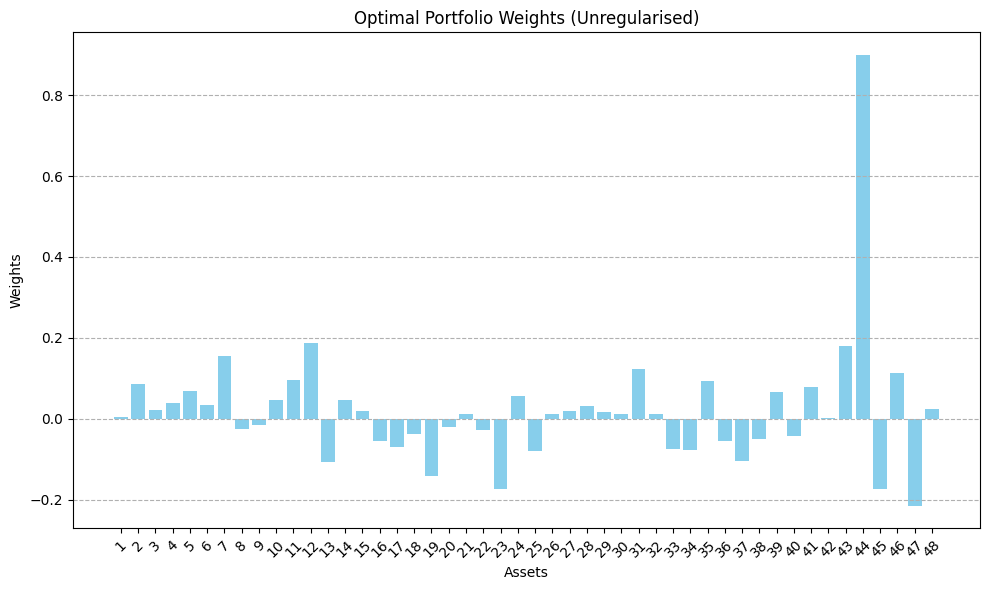

In [280]:
import matplotlib.pyplot as plt
# Example: Compute the covariance matrix and minimize variance for a given time window
start_year = '2013'
end_year = '2015'

time_window_returns = industry_returns.loc[pd.to_datetime(start_year):pd.to_datetime(end_year)]

# Calculate covariance matrix for the selected time window
covariance_matrix = time_window_returns.cov()
# Minimize portfolio variance and obtain optimal weights and minimized variance
optimal_weights, minimized_variance = minimize_variance(covariance_matrix)

# Output the results
print("Optimal Weights:", optimal_weights)
print("Minimized Portfolio Variance:", minimized_variance)

# Plotting the optimal weights as bars
asset_labels = [f'{i+1}' for i in range(len(covariance_matrix))]  # Generate asset labels
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(asset_labels, optimal_weights, color='skyblue')  # Create a bar plot
plt.xlabel('Assets')  # Label on X-axis
plt.ylabel('Weights')  # Label on Y-axis
plt.title('Optimal Portfolio Weights (Unregularised)')  # Title of the plot
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.grid(axis='y', linestyle='--')  # Add horizontal grid lines for clarity
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Display the plot


### Testing in sample and out of sample error for the different lengths N of the training time series

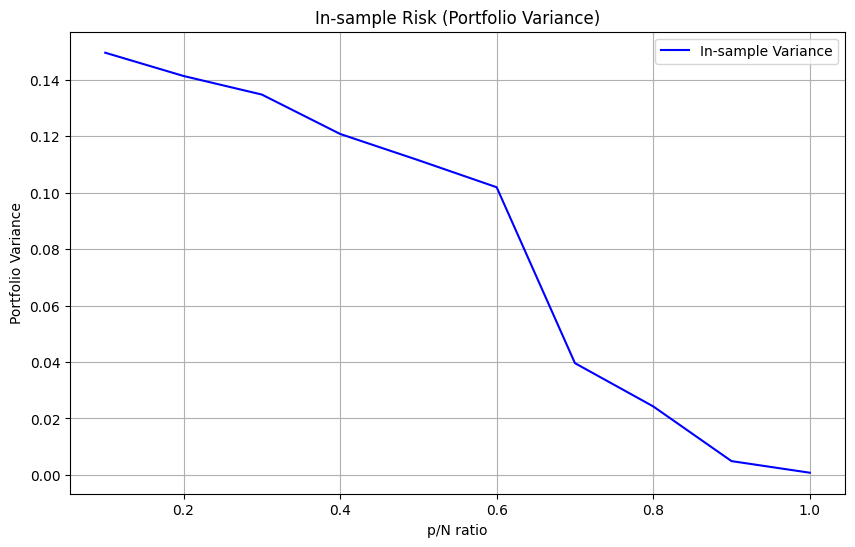

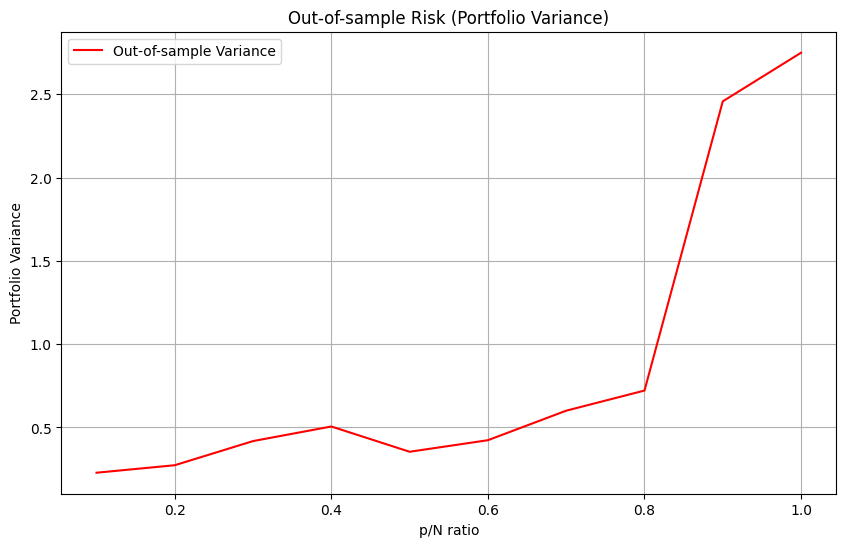

In [190]:
def compute_variances(industry_returns, start_date, p_N_ratio):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)
    
    start_index = industry_returns.index.get_loc(start_date)
    train_returns = industry_returns.iloc[start_index:start_index+N]
    test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
    
    cov_matrix_train = train_returns.cov()
    cov_matrix_test = test_returns.cov()
    
    optimal_weights, in_sample_variance = minimize_variance(cov_matrix_train)
    out_sample_variance = portfolio_variance(optimal_weights, cov_matrix_test)
    
    return in_sample_variance, out_sample_variance

# Plotting variances vs p/N ratio
p_N_ratios = np.linspace(0.1, 1, 10)  # From 0.1 to 1
in_sample_variances = []
out_sample_variances = []
start_date = '2000-01-03'  # Start date

for ratio in p_N_ratios:
    in_variance, out_variance = compute_variances(industry_returns, start_date, ratio)
    in_sample_variances.append(in_variance)
    out_sample_variances.append(out_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p_N_ratios, in_sample_variances, color = 'blue', label='In-sample Variance')
plt.xlabel('p/N ratio')
plt.ylabel('Portfolio Variance')
plt.title('In-sample Risk (Portfolio Variance)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_N_ratios, out_sample_variances, color = 'red', label='Out-of-sample Variance')
plt.xlabel('p/N ratio')
plt.ylabel('Portfolio Variance')
plt.grid(True)
plt.title('Out-of-sample Risk (Portfolio Variance)')
plt.legend()
plt.show()


### Ban on Short Selling

Optimal Weights: [0.00000000e+00 2.10036587e-16 0.00000000e+00 1.85524576e-02
 1.35334225e-01 1.81306156e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.23556922e-17 0.00000000e+00 3.61373010e-17 0.00000000e+00
 6.95059896e-17 1.75962681e-16 1.89956337e-16 1.18112642e-16
 1.69316771e-16 1.05940835e-16 1.47854849e-16 0.00000000e+00
 1.43205578e-16 0.00000000e+00 2.60522156e-03 7.98360795e-17
 0.00000000e+00 2.57055428e-17 1.76340859e-01 2.02227656e-17
 0.00000000e+00 0.00000000e+00 9.85877395e-18 1.28195787e-16
 8.35895669e-17 0.00000000e+00 0.00000000e+00 2.24169053e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.52359609e-01
 0.00000000e+00 1.30995116e-02 0.00000000e+00 1.70811691e-03]
Minimized Portfolio Variance: 0.3463593055302568


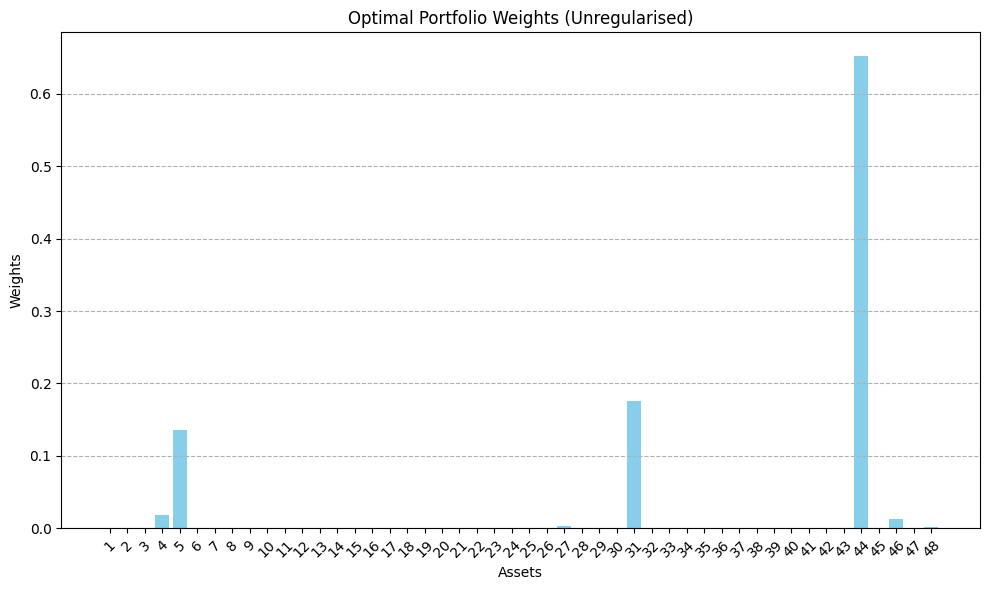

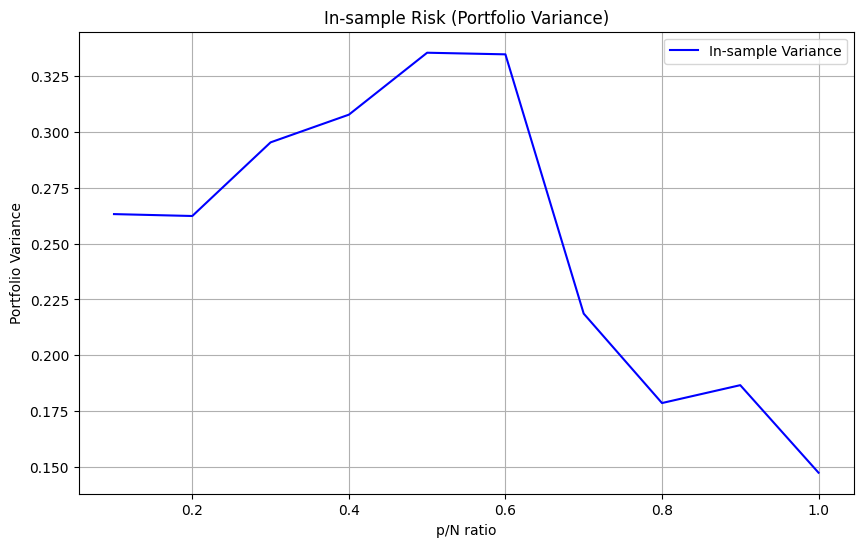

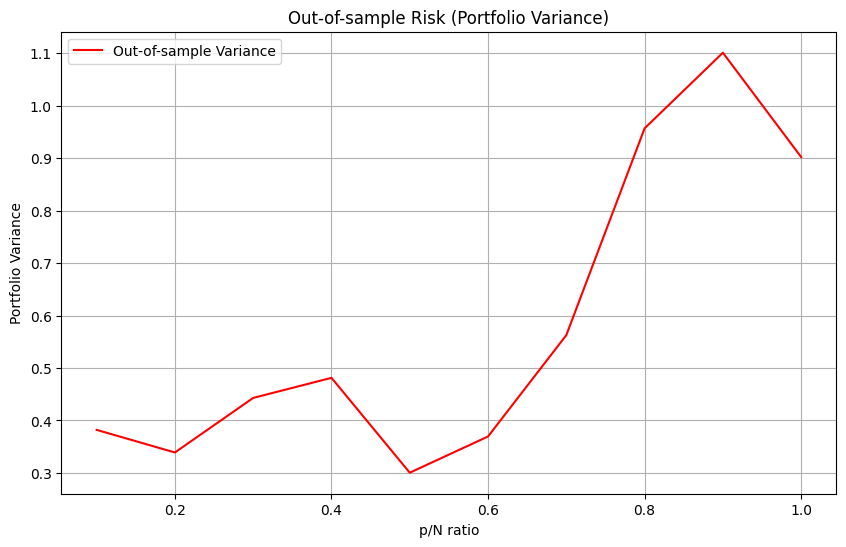

In [287]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def portfolio_variance(weights, covariance_matrix):
    """Calculate the portfolio variance given weights and covariance matrix."""
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

def minimize_variance_no_short_selling(covariance_matrix):
    num_assets = covariance_matrix.shape[0]
    initial_guess = np.ones(num_assets) / num_assets
    bounds = [(0, 1) for _ in range(num_assets)]  # Allows for negative weights
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    result = minimize(portfolio_variance, initial_guess, args=(covariance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    # Calculate minimized portfolio variance using optimal weights
    min_variance = portfolio_variance(result.x, covariance_matrix)

    return result.x, min_variance

start_year = '2013'
end_year = '2015'

time_window_returns = industry_returns.loc[pd.to_datetime(start_year):pd.to_datetime(end_year)]

# Calculate covariance matrix for the selected time window
covariance_matrix = time_window_returns.cov()
# Minimize portfolio variance and obtain optimal weights and minimized variance
optimal_weights, minimized_variance = minimize_variance_no_short_selling(covariance_matrix)

# Output the results
print("Optimal Weights:", optimal_weights)
print("Minimized Portfolio Variance:", minimized_variance)

# Plotting the optimal weights as bars
asset_labels = [f'{i+1}' for i in range(len(covariance_matrix))]  # Generate asset labels
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(asset_labels, optimal_weights, color='skyblue')  # Create a bar plot
plt.xlabel('Assets')  # Label on X-axis
plt.ylabel('Weights')  # Label on Y-axis
plt.title('Optimal Portfolio Weights (Unregularised)')  # Title of the plot
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.grid(axis='y', linestyle='--')  # Add horizontal grid lines for clarity
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Display the plot

def compute_variances(industry_returns, start_date, p_N_ratio):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)
    
    start_index = industry_returns.index.get_loc(start_date)
    train_returns = industry_returns.iloc[start_index:start_index+N]
    test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
    
    cov_matrix_train = train_returns.cov()
    cov_matrix_test = test_returns.cov()
    
    optimal_weights, in_sample_variance = minimize_variance_no_short_selling(cov_matrix_train)
    out_sample_variance = portfolio_variance(optimal_weights, cov_matrix_test)
    
    return in_sample_variance, out_sample_variance

# Plotting variances vs p/N ratio
p_N_ratios = np.linspace(0.1, 1, 10)  # From 0.1 to 1
in_sample_variances = []
out_sample_variances = []
start_date = '2000-01-04'  # Start date

for ratio in p_N_ratios:
    in_variance, out_variance = compute_variances(industry_returns, start_date, ratio)
    in_sample_variances.append(in_variance)
    out_sample_variances.append(out_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p_N_ratios, in_sample_variances, color = 'blue', label='In-sample Variance')
plt.xlabel('p/N ratio')
plt.ylabel('Portfolio Variance')
plt.title('In-sample Risk (Portfolio Variance)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_N_ratios, out_sample_variances, color = 'red', label='Out-of-sample Variance')
plt.xlabel('p/N ratio')
plt.ylabel('Portfolio Variance')
plt.grid(True)
plt.title('Out-of-sample Risk (Portfolio Variance)')
plt.legend()
plt.show()

### Different lengths of training data

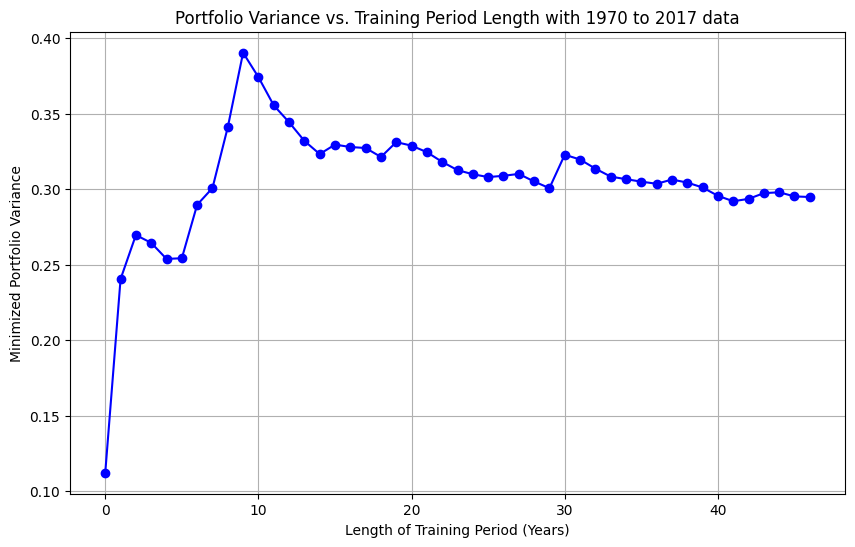

In [94]:
import matplotlib.pyplot as plt

total_years = 47
training_lengths = range(0, total_years, 1)
# Store variances for plotting
variances = []
lengths = []

# Current year for testing - you can adjust this based on your analysis needs
current_year = 2017

for length in training_lengths:
    # Calculate the start year for the training period
    start_year = current_year - length
    
    # Filter the DataFrame to the training period
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{current_year}-12-31')
    training_data = industry_returns.loc[start_date:end_date]
    
    # Compute the covariance matrix for the training data
    covariance_matrix = training_data.cov()
    
    # Compute optimal weights and portfolio variance using the minimize_variance function
    _, min_variance = minimize_variance(covariance_matrix)
    
    # Store the variance and length for plotting
    variances.append(min_variance)
    lengths.append(length)

# Plotting the variance over different training lengths
plt.figure(figsize=(10, 6))
plt.plot(lengths, variances, marker='o', linestyle='-', color='b')
plt.title(f'Portfolio Variance vs. Training Period Length with {current_year - total_years} to {current_year} data')
plt.xlabel('Length of Training Period (Years)')
plt.ylabel('Minimized Portfolio Variance')
plt.grid(True)
plt.show()


##  Global Minimum Variance Portfolio Ridge Regularised with Cross-Validated hyperparameters

### Visualise the impact of different lambda regularisation values on the out-of-sample variance

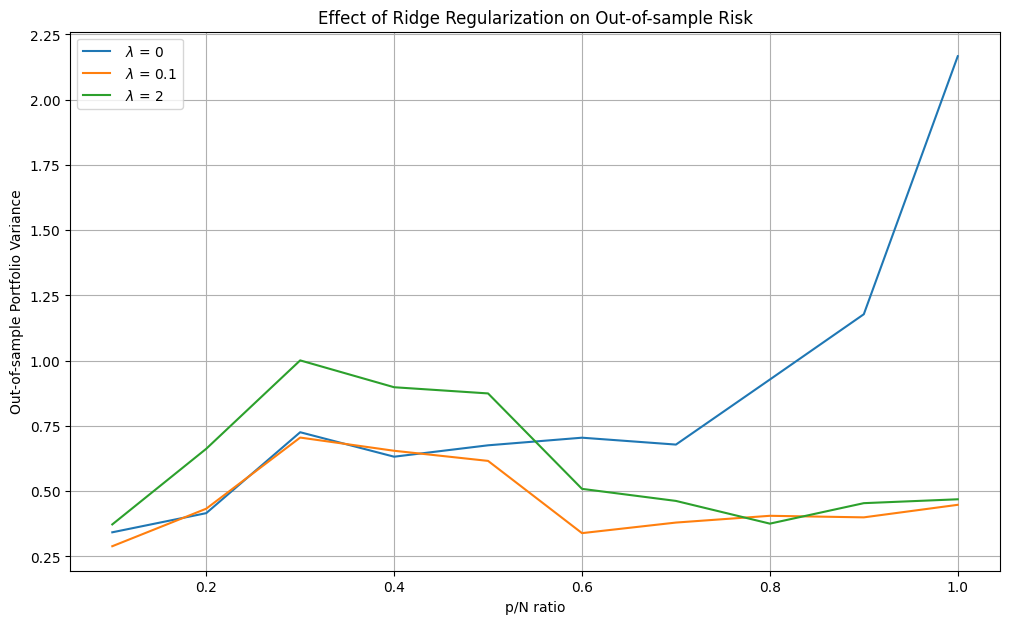

In [304]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Assuming industry_returns is already defined

def portfolio_variance_reg(weights, covariance_matrix, lambda_reg):
    """Include regularization in portfolio variance calculation."""
    return np.dot(weights.T, np.dot(covariance_matrix, weights)) + lambda_reg * np.sum(np.square(weights))

def minimize_variance_reg(covariance_matrix, lambda_reg):
    num_assets = covariance_matrix.shape[0]
    initial_guess = np.ones(num_assets) / num_assets
    bounds = [(-1, 1) for _ in range(num_assets)]
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    result = minimize(portfolio_variance_reg, initial_guess, args=(covariance_matrix, lambda_reg), method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x, portfolio_variance_reg(result.x, covariance_matrix, lambda_reg)

def compute_variances_with_reg(industry_returns, start_date, p_N_ratio, lambda_reg):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)
    start_index = industry_returns.index.get_loc(start_date)
    train_returns = industry_returns.iloc[start_index:start_index+N]
    test_returns = industry_returns.iloc[start_index+N:start_index+2*N]

    cov_matrix_train = train_returns.cov()
    cov_matrix_test = test_returns.cov()

    optimal_weights, in_sample_variance = minimize_variance_reg(cov_matrix_train, lambda_reg)
    out_sample_variance = portfolio_variance_reg(optimal_weights, cov_matrix_test, lambda_reg)
    return in_sample_variance, out_sample_variance

# Set lambda values for regularization strength
lambda_values = [0, 0.1, 2]
p_N_ratios = np.linspace(0.1, 1, 10)
start_date = '2015-01-05'

# Store variances for plotting
variances_by_lambda = {lambda_reg: [] for lambda_reg in lambda_values}

# Compute variances for different lambda values and p/N ratios
for lambda_reg in lambda_values:
    for ratio in p_N_ratios:
        _, out_variance = compute_variances_with_reg(industry_returns, start_date, ratio, lambda_reg)
        variances_by_lambda[lambda_reg].append(out_variance)

# Plotting
plt.figure(figsize=(12, 7))
for lambda_reg, variances in variances_by_lambda.items():
    plt.plot(p_N_ratios, variances, label=fr' $ \lambda $ = {lambda_reg}')

plt.xlabel('p/N ratio')
plt.ylabel('Out-of-sample Portfolio Variance')
plt.title('Effect of Ridge Regularization on Out-of-sample Risk')
plt.legend()
plt.grid(True)
plt.show()


### Plotting cross-validated values of the variance in terms of different lambdas

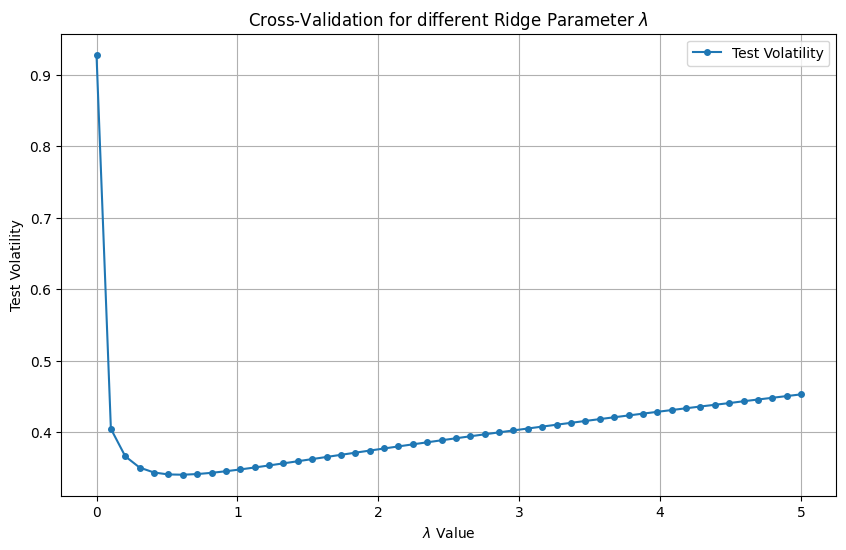

Optimal lambda: 0.6122448979591837
Minimum Test Volatility: 0.34019611483098167


In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cross_validate_lambda(industry_returns, start_date, p_N_ratio, lambda_range):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)  # Number of samples based on the p/N ratio
    start_index = industry_returns.index.get_loc(start_date)
    
    # Initialize arrays to store results
    lambda_values = np.linspace(0, 5, num=50)  # Lambda values from 0 to 10
    test_volatilities = []
    
    for lambda_reg in lambda_values:
        # Splitting the data into training and testing datasets of equal length
        train_returns = industry_returns.iloc[start_index:start_index+N]
        test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
        
        # Calculating covariance matrices for both datasets
        cov_matrix_train = train_returns.cov()
        cov_matrix_test = test_returns.cov()
        
        # Minimizing the portfolio variance with regularization in the training dataset
        optimal_weights, _ = minimize_variance_reg(cov_matrix_train, lambda_reg)
        
        # Calculating the portfolio variance with these weights in the testing dataset
        port_variance = portfolio_variance_reg(optimal_weights, cov_matrix_test, lambda_reg)
        test_volatilities.append(port_variance)
    
    return lambda_values, test_volatilities

# Running the cross-validation for a fixed p/N ratio and plotting the results
p_N_ratio = 0.8 # Fixed ratio
start_date = '2015-01-05'  # NU NE MAI JUCAM CU ACEST STARTING DATE
lambda_values, test_volatilities = cross_validate_lambda(industry_returns, start_date, p_N_ratio, np.linspace(0, 10, num=50))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, test_volatilities, '-o', markersize=4, label='Test Volatility')
plt.xlabel('$ \lambda $ Value')
plt.ylabel('Test Volatility')
plt.title(r'Cross-Validation for different Ridge Parameter $ \lambda $')
plt.legend()
plt.grid(True)
plt.show()

# Identifying the optimal lambda
optimal_lambda_index = np.argmin(test_volatilities)  # Get the index of the smallest test volatility
optimal_lambda = lambda_values[optimal_lambda_index]  # Use the index to find the corresponding lambda value
min_test_volatility = test_volatilities[optimal_lambda_index]  # Minimum test volatility

print(f"Optimal lambda: {optimal_lambda}")
print(f"Minimum Test Volatility: {min_test_volatility}")



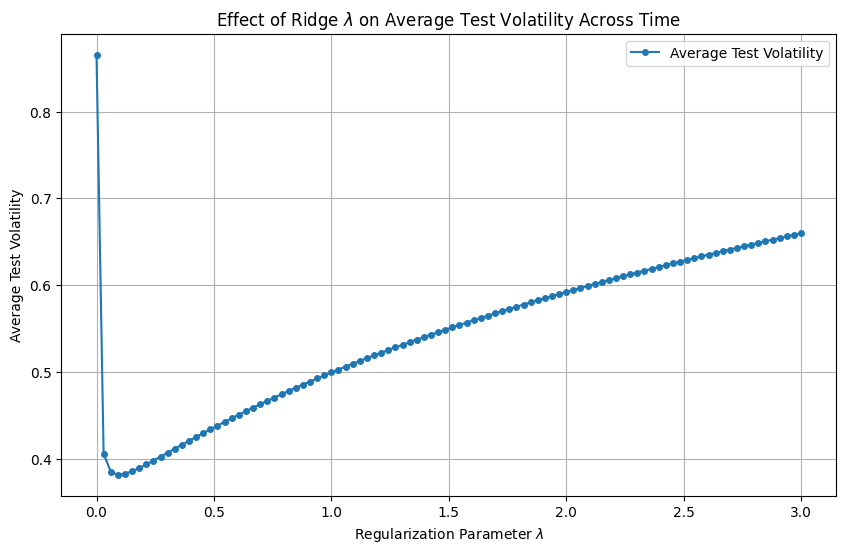

Optimal lambda: 0.09090909090909091
Minimum Average Test Volatility: 0.3813480272814449


In [308]:
def compute_average_cross_validated_variances(industry_returns, lambda_values, p_N_ratio, start_dates):
    # Initialize a dictionary to store cumulative variances for each lambda value
    cumulative_variances = {lambda_val: [] for lambda_val in lambda_values}
    
    for start_date in start_dates:
        start_index = industry_returns.index.get_loc(start_date)
        N = int(48 / p_N_ratio)  # Number of samples based on the p/N ratio
        
        for lambda_reg in lambda_values:
            train_returns = industry_returns.iloc[start_index:start_index+N]
            test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
            
            cov_matrix_train = train_returns.cov()
            cov_matrix_test = test_returns.cov()
            
            optimal_weights, _ = minimize_variance_reg(cov_matrix_train, lambda_reg)
            test_volatility= portfolio_variance_reg(optimal_weights, cov_matrix_test, lambda_reg)
            
            cumulative_variances[lambda_reg].append(test_volatility)
    
    # Compute average variances for each lambda
    average_variances = {lambda_val: np.mean(variances) for lambda_val, variances in cumulative_variances.items()}
    return average_variances

# Example setup
p_N_ratio = 0.8
lambda_values = np.linspace(0, 3, 100)
start_dates = ['2012-01-04', '2013-01-07', '2014-01-06', '2015-01-05']

average_variances = compute_average_cross_validated_variances(industry_returns, lambda_values, p_N_ratio, start_dates)

# Plotting the average test volatility against lambda
plt.figure(figsize=(10, 6))
plt.plot(list(average_variances.keys()), list(average_variances.values()), '-o', markersize=4, label='Average Test Volatility')
plt.xlabel(r'Regularization Parameter $\lambda$')
plt.ylabel('Average Test Volatility')
plt.title(r'Effect of Ridge $\lambda$ on Average Test Volatility Across Time')
plt.legend()
plt.grid(True)
plt.show()

# Find the lambda value that minimizes the average test volatility
optimal_lambda = min(average_variances, key=average_variances.get)
min_avg_volatility = average_variances[optimal_lambda]

print(f"Optimal lambda: {optimal_lambda}")
print(f"Minimum Average Test Volatility: {min_avg_volatility}")


##  Global Minimum Variance Portfolio Lasso Regularised with Cross-Validated hyperparameters

### Visualise the impact of different lambda regularisation values on the out-of-sample variance

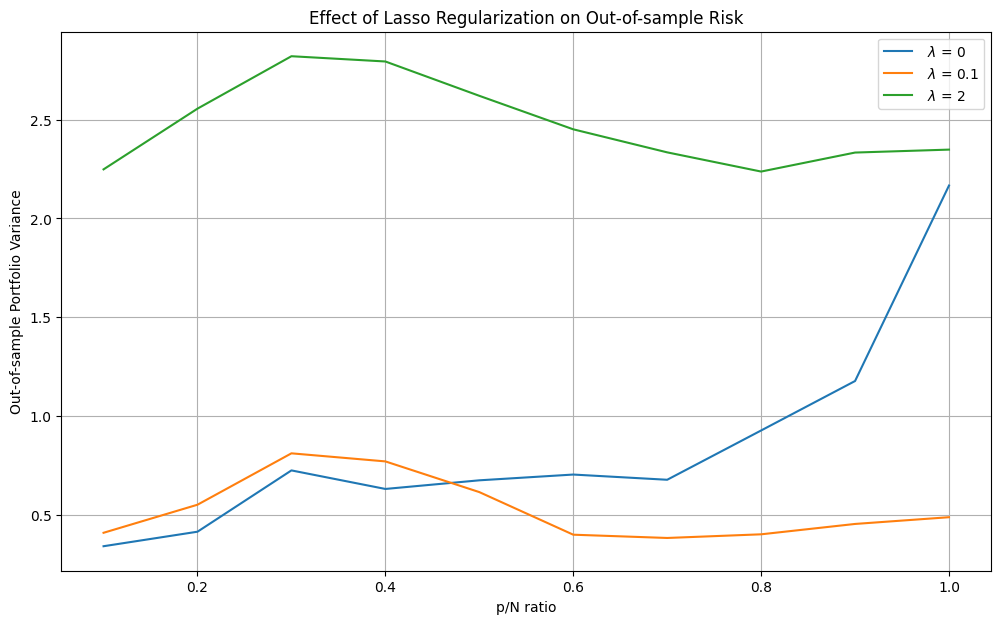

In [291]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Assuming industry_returns is already defined

def portfolio_variance_lasso(weights, covariance_matrix, lambda_reg):
    """Include regularization in portfolio variance calculation."""
    return np.dot(weights.T, np.dot(covariance_matrix, weights)) + lambda_reg * np.sum(np.abs(weights))

def minimize_variance_lasso(covariance_matrix, lambda_reg):
    num_assets = covariance_matrix.shape[0]
    initial_guess = np.ones(num_assets) / num_assets
    bounds = [(-1, 1) for _ in range(num_assets)]
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    result = minimize(portfolio_variance_lasso, initial_guess, args=(covariance_matrix, lambda_reg), method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x, portfolio_variance_lasso(result.x, covariance_matrix, lambda_reg)

def compute_variances_with_lasso(industry_returns, start_date, p_N_ratio, lambda_reg):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)
    start_index = industry_returns.index.get_loc(start_date)
    train_returns = industry_returns.iloc[start_index:start_index+N]
    test_returns = industry_returns.iloc[start_index+N:start_index+2*N]

    cov_matrix_train = train_returns.cov()
    cov_matrix_test = test_returns.cov()

    optimal_weights, in_sample_variance = minimize_variance_lasso(cov_matrix_train, lambda_reg)
    out_sample_variance = portfolio_variance_lasso(optimal_weights, cov_matrix_test, lambda_reg)
    return in_sample_variance, out_sample_variance

# Set lambda values for regularization strength
lambda_values = [0, 0.1, 2]
p_N_ratios = np.linspace(0.1, 1, 10)
start_date = '2015-01-05'

# Store variances for plotting
variances_by_lambda = {lambda_reg: [] for lambda_reg in lambda_values}

# Compute variances for different lambda values and p/N ratios
for lambda_reg in lambda_values:
    for ratio in p_N_ratios:
        _, out_variance = compute_variances_with_lasso(industry_returns, start_date, ratio, lambda_reg)
        variances_by_lambda[lambda_reg].append(out_variance)

# Plotting
plt.figure(figsize=(12, 7))
for lambda_reg, variances in variances_by_lambda.items():
    plt.plot(p_N_ratios, variances, label=fr' $ \lambda $ = {lambda_reg}')

plt.xlabel('p/N ratio')
plt.ylabel('Out-of-sample Portfolio Variance')
plt.title('Effect of Lasso Regularization on Out-of-sample Risk')
plt.legend()
plt.grid(True)
plt.show()

### Plotting cross-validated values of the variance in terms of different lambdas

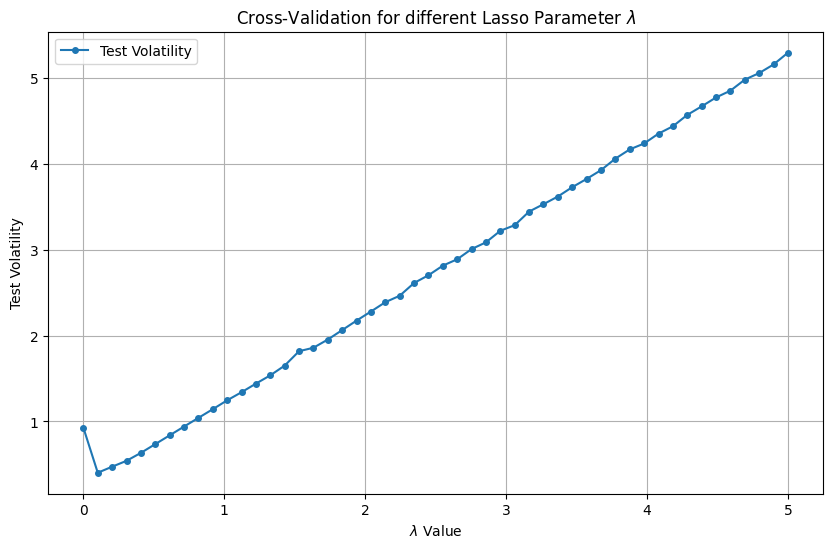

Optimal lambda: 0.10204081632653061
Minimum Test Volatility: 0.4030244057820533


In [303]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cross_validate_lasso(industry_returns, start_date, p_N_ratio, lambda_range):
    p = 48  # Number of assets
    N = int(p / p_N_ratio)  # Number of samples based on the p/N ratio
    start_index = industry_returns.index.get_loc(start_date)
    
    # Initialize arrays to store results
    lambda_values = np.linspace(0, 5, num=50)  # Lambda values from 0 to 10
    test_volatilities = []
    
    for lambda_reg in lambda_values:
        # Splitting the data into training and testing datasets of equal length
        train_returns = industry_returns.iloc[start_index:start_index+N]
        test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
        
        # Calculating covariance matrices for both datasets
        cov_matrix_train = train_returns.cov()
        cov_matrix_test = test_returns.cov()
        
        # Minimizing the portfolio variance with regularization in the training dataset
        optimal_weights, _ = minimize_variance_lasso(cov_matrix_train, lambda_reg)
        
        # Calculating the portfolio variance with these weights in the testing dataset
        port_variance = portfolio_variance_lasso(optimal_weights, cov_matrix_test, lambda_reg)
        test_volatilities.append(port_variance)
    
    return lambda_values, test_volatilities

# Running the cross-validation for a fixed p/N ratio and plotting the results
p_N_ratio = 0.8 # Fixed ratio
start_date = '2015-01-05'  # NU NE MAI JUCAM CU ACEST STARTING DATE
lambda_values, test_volatilities = cross_validate_lasso(industry_returns, start_date, p_N_ratio, np.linspace(0, 10, num=50))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, test_volatilities, '-o', markersize=4, label='Test Volatility')
plt.xlabel('$ \lambda $ Value')
plt.ylabel('Test Volatility')
plt.title(r'Cross-Validation for different Lasso Parameter $ \lambda $')
plt.legend()
plt.grid(True)
plt.show()

# Identifying the optimal lambda
optimal_lambda_index = np.argmin(test_volatilities)  # Get the index of the smallest test volatility
optimal_lambda = lambda_values[optimal_lambda_index]  # Use the index to find the corresponding lambda value
min_test_volatility = test_volatilities[optimal_lambda_index]  # Minimum test volatility

print(f"Optimal lambda: {optimal_lambda}")
print(f"Minimum Test Volatility: {min_test_volatility}")


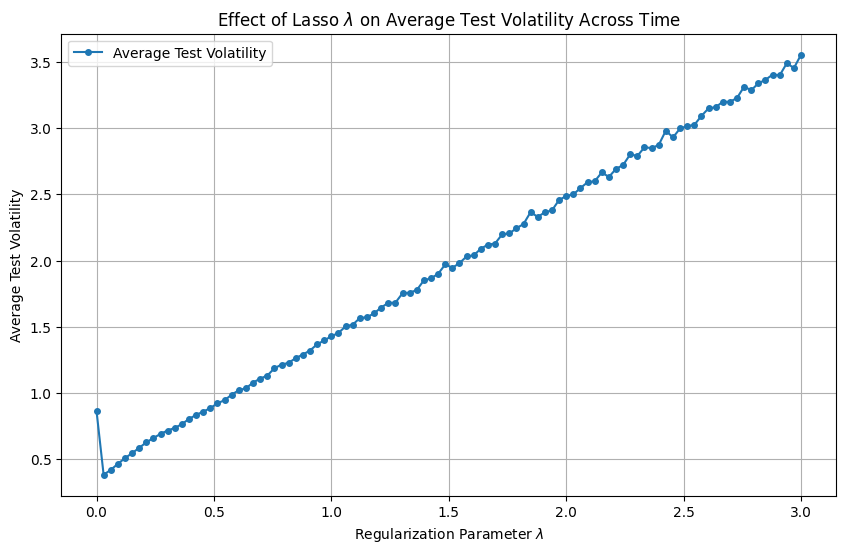

Optimal lambda: 0.030303030303030304
Minimum Average Test Volatility: 0.38399821937767764


In [302]:
def compute_average_cross_validated_variances_lasso(industry_returns, lambda_values, p_N_ratio, start_dates):
    # Initialize a dictionary to store cumulative variances for each lambda value
    cumulative_variances = {lambda_val: [] for lambda_val in lambda_values}
    
    for start_date in start_dates:
        start_index = industry_returns.index.get_loc(start_date)
        N = int(48 / p_N_ratio)  # Number of samples based on the p/N ratio
        
        for lambda_reg in lambda_values:
            train_returns = industry_returns.iloc[start_index:start_index+N]
            test_returns = industry_returns.iloc[start_index+N:start_index+2*N]
            
            cov_matrix_train = train_returns.cov()
            cov_matrix_test = test_returns.cov()
            
            optimal_weights, _ = minimize_variance_lasso(cov_matrix_train, lambda_reg)
            test_volatility= portfolio_variance_lasso(optimal_weights, cov_matrix_test, lambda_reg)
            
            cumulative_variances[lambda_reg].append(test_volatility)
    
    # Compute average variances for each lambda
    average_variances = {lambda_val: np.mean(variances) for lambda_val, variances in cumulative_variances.items()}
    return average_variances

# Example setup
p_N_ratio = 0.8
lambda_values = np.linspace(0, 3, 100)
start_dates = ['2012-01-04', '2013-01-07', '2014-01-06', '2015-01-05']

average_variances = compute_average_cross_validated_variances_lasso(industry_returns, lambda_values, p_N_ratio, start_dates)

# Plotting the average test volatility against lambda
plt.figure(figsize=(10, 6))
plt.plot(list(average_variances.keys()), list(average_variances.values()), '-o', markersize=4, label='Average Test Volatility')
plt.xlabel(r'Regularization Parameter $\lambda$')
plt.ylabel('Average Test Volatility')
plt.title(r'Effect of Lasso $\lambda$ on Average Test Volatility Across Time')
plt.legend()
plt.grid(True)
plt.show()

# Find the lambda value that minimizes the average test volatility
optimal_lambda = min(average_variances, key=average_variances.get)
min_avg_volatility = average_variances[optimal_lambda]

print(f"Optimal lambda: {optimal_lambda}")
print(f"Minimum Average Test Volatility: {min_avg_volatility}")